<a href="https://colab.research.google.com/github/HarryPotter12/PractiseML/blob/master/Ass1_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import io
import numpy as np
from numpy import diag
from numpy import zeros
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from scipy.linalg import svd
from sklearn.utils.extmath import randomized_svd
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
A_orig = pd.read_csv('/content/gdrive/My Drive/Datasets/dense_matrix_10000.csv',sep=' ',header=None)

In [0]:
A_orig_min = A_orig.values.min()
A_orig_max = A_orig.values.max()

In [0]:
A_orig_numpy = A_orig.to_numpy()

In [0]:
unique, unique_counts = np.unique(A_orig_numpy, return_counts=True)
print("Values\tCounts")
for i in range(len(unique)):
  print(unique[i], "\t", unique_counts[i], end="\n")

Values	Counts
0 	 99430892
1 	 428762
2 	 83545
3 	 28864
4 	 13101
5 	 6507
6 	 3453
7 	 1921
8 	 1091
9 	 656
10 	 427
11 	 258
12 	 146
13 	 107
14 	 92
15 	 54
16 	 34
17 	 34
18 	 17
19 	 8
20 	 10
21 	 3
22 	 4
23 	 4
24 	 7
27 	 2
28 	 1


In [0]:
b1 = 0
b2 = 0
b3 = 0
for i in range(A_orig.shape[0]):
  for j in range(A_orig.shape[1]):
    if A_orig[i][j] < 1:
      b1 = b1 + 1
    elif A_orig[i][j] < 3 and A_orig[i][j] >= 1:
      b2 = b2 + 1
    else:
      b3 = b3 + 1
print(b1, "\t", b2, "\t", b3, end="\n")

99430892 	 512307 	 56801


In [0]:
colors = [(1, 1, 1), (1, 0, 0), (0, 0, 1)]  # White -> Red -> Blue
no_of_segments = 3
cm = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap', colors, N=no_of_segments)
segments = [A_orig_min, 1, 3, A_orig_max]
my_norm = matplotlib.colors.BoundaryNorm(segments, len(segments))

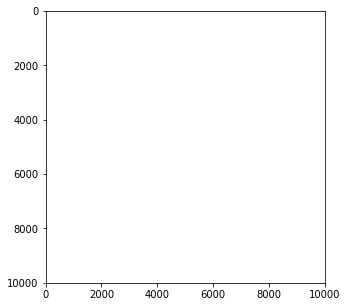

In [0]:
plt.rcParams["figure.figsize"] = (100, 100)
plt.pcolormesh(A_orig, cmap=cm, norm=my_norm)
plt.gca().invert_yaxis()

In [0]:
print("Max : ", A_orig_max)
print("Min : ", A_orig_min)
print("Segments : ", segments)

Max :  28
Min :  0
Segments :  [0, 1, 3, 28]


In [0]:
U_orig, s_gen_orig, VT_orig = svd(A_orig)

In [0]:
print("U : ", U_orig.shape, "\n", U_orig)
print("s : ", s_gen_orig.shape, "\n", s_gen_orig)
print("VT : ", VT_orig.shape, "\n", VT_orig)

U :  (10000, 10000) 
 [[-9.83287913e-03 -1.53926442e-02 -1.13622300e-02 ... -2.02456570e-02
   2.22968935e-02  5.68115442e-03]
 [-9.56494279e-03 -1.26570096e-02 -5.11677096e-03 ... -5.45178304e-03
  -2.02109312e-03 -3.39726981e-03]
 [-1.12998504e-02  1.81762801e-03 -8.58777259e-03 ... -5.95659605e-04
  -1.92242652e-03  1.71664945e-03]
 ...
 [-1.40309070e-02  2.51897631e-02 -9.80231462e-04 ...  9.28539983e-03
  -1.42612983e-02  4.37993618e-03]
 [-1.20792160e-02  3.66031388e-03 -6.71756149e-03 ...  2.52619106e-17
   1.66533454e-16 -3.87731026e-16]
 [-8.25825917e-03  2.15769499e-02 -6.21508605e-03 ... -2.87714676e-02
  -1.29393869e-02 -3.84245612e-03]]
s :  (10000,) 
 [4.09737717e+02 1.69300830e+02 1.59701308e+02 ... 3.28564633e-14
 3.28564633e-14 8.58847331e-15]
VT :  (10000, 10000) 
 [[-1.69357549e-04 -1.12208325e-04 -2.35196153e-04 ... -1.72081604e-04
  -4.78795557e-05 -5.21165477e-05]
 [-5.49060339e-06  5.19315202e-05  2.29581019e-04 ...  3.92413799e-04
  -3.57672245e-05 -2.26101668e-

In [0]:
Sigma_orig = zeros((A_orig.shape[0], A_orig.shape[1]))
# populate Sigma with diagonal matrix
Sigma_orig[:A_orig.shape[1], :A_orig.shape[1]] = diag(s_gen_orig)
# reconstruct matrix
A_recon = U_orig.dot(Sigma_orig.dot(VT_orig))
print(A_recon)
print(Sigma_orig.shape)
print(Sigma_orig)
print(A_recon.shape)

[[-1.20170258e-16  1.45639218e-14 -1.20168501e-15 ... -5.30290567e-16
  -1.43331527e-16  1.71568218e-16]
 [ 2.00116616e-16 -6.99527885e-14  2.33656012e-13 ...  5.90441913e-16
  -1.63382491e-16  4.85790336e-17]
 [-7.38045218e-17  8.05178508e-16 -4.17914960e-15 ... -8.09060017e-16
   1.35352477e-16 -1.94104376e-16]
 ...
 [-2.03708036e-16 -1.15564517e-15 -1.90643992e-15 ...  9.91024497e-16
  -3.53449908e-17 -3.13412355e-16]
 [ 3.12937169e-16 -1.05400841e-15 -1.39494637e-15 ... -4.83092218e-16
  -6.30980253e-17  2.51190585e-16]
 [ 1.27908751e-16 -5.41640300e-16 -9.07868548e-16 ...  5.74431472e-16
  -1.72740511e-16 -8.33615945e-17]]
(10000, 10000)
[[4.09737717e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.69300830e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.59701308e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 

In [0]:
k=1
U_1, s_gen_1, VT_1 = randomized_svd(A_orig_numpy, n_components=k, n_iter=5, random_state=None)
Sigma_1 = zeros((k, k))
# populate Sigma with diagonal matrix
Sigma_1[:k, :k] = diag(s_gen_1)
# reconstruct matrix
A_1 = U_1.dot(Sigma_1.dot(VT_1))
print(A_1)
print(U_1.shape)
print(Sigma_1.shape)
print(VT_1.shape)
print(A_1.shape)

[[0.00068232 0.00045208 0.00094758 ... 0.0006933  0.0001929  0.00020997]
 [0.00066373 0.00043976 0.00092176 ... 0.00067441 0.00018765 0.00020425]
 [0.00078412 0.00051952 0.00108895 ... 0.00079673 0.00022168 0.0002413 ]
 ...
 [0.00097364 0.00064509 0.00135214 ... 0.0009893  0.00027526 0.00029962]
 [0.0008382  0.00055535 0.00116406 ... 0.00085169 0.00023697 0.00025794]
 [0.00057306 0.00037968 0.00079584 ... 0.00058228 0.00016201 0.00017635]]
(10000, 1)
(1, 1)
(1, 10000)
(10000, 10000)


In [0]:
k=2
U_2, s_gen_2, VT_2 = randomized_svd(A_orig_numpy, n_components=k, n_iter=5, random_state=None)
Sigma_2 = zeros((k, k))
# populate Sigma with diagonal matrix
Sigma_2[:k, :k] = diag(s_gen_2)
# reconstruct matrix
A_2 = U_2.dot(Sigma_2.dot(VT_2))
print(A_2)
print(U_2.shape)
print(Sigma_2.shape)
print(VT_2.shape)
print(A_2.shape)

[[ 6.91730550e-04  3.15053576e-04  3.46731591e-04 ... -3.29666530e-04
   2.85188663e-04  2.16058018e-04]
 [ 6.71517717e-04  3.26337811e-04  4.24410526e-04 ... -1.72347035e-04
   2.64035429e-04  2.09288211e-04]
 [ 7.83038856e-04  5.35294260e-04  1.15811541e-03 ...  9.14485533e-04
   2.11058276e-04  2.40597919e-04]
 ...
 [ 9.58258844e-04  8.69094830e-04  2.33443498e-03 ...  2.66168133e-03
   1.24385454e-04  2.89668821e-04]
 [ 8.35893360e-04  5.89007627e-04  1.31163200e-03 ...  1.10293285e-03
   2.14304667e-04  2.56446441e-04]
 [ 5.59776541e-04  5.73185893e-04  1.64436240e-03 ...  2.02691400e-03
   3.16836036e-05  1.67753969e-04]]
(10000, 2)
(2, 2)
(2, 10000)
(10000, 10000)


In [0]:
k=5
U_5, s_gen_5, VT_5 = randomized_svd(A_orig_numpy, n_components=k, n_iter=5, random_state=None)
Sigma_5 = zeros((k, k))
# populate Sigma with diagonal matrix
Sigma_5[:k, :k] = diag(s_gen_5)
# reconstruct matrix
A_5 = U_5.dot(Sigma_5.dot(VT_5))
print(A_5)
print(U_5.shape)
print(Sigma_5.shape)
print(VT_5.shape)
print(A_5.shape)

[[-4.42970008e-04 -9.99544773e-04 -4.94879050e-04 ... -4.00289635e-04
   3.60481198e-04  3.25992215e-04]
 [-4.57298968e-05 -5.56209966e-04 -2.86784274e-04 ... -4.16644856e-04
   2.51260800e-04  2.72254922e-04]
 [ 4.26711655e-04  1.22912517e-04  1.05822821e-03 ...  8.23033781e-04
   3.48133551e-04  3.63779726e-04]
 ...
 [-5.25933366e-05 -2.51499274e-04  1.37164409e-03 ...  2.89567982e-03
  -9.50406188e-06  2.04267055e-04]
 [ 2.91662158e-04 -1.72800732e-04  6.35716411e-04 ...  4.50908597e-04
   2.36946234e-04  3.99496339e-04]
 [ 7.87955419e-05 -3.42959325e-05  1.19650617e-03 ...  1.71740905e-03
   7.63410758e-05  2.66790499e-04]]
(10000, 5)
(5, 5)
(5, 10000)
(10000, 10000)


In [0]:
k=10
U_10, s_gen_10, VT_10 = randomized_svd(A_orig_numpy, n_components=k, n_iter=5, random_state=None)
Sigma_10 = zeros((k, k))
# populate Sigma with diagonal matrix
Sigma_10[:k, :k] = diag(s_gen_10)
# reconstruct matrix
A_10 = U_10.dot(Sigma_10.dot(VT_10))
print(A_10)
print(U_10.shape)
print(Sigma_10.shape)
print(VT_10.shape)
print(A_10.shape)

[[-2.98559632e-04 -1.13793078e-03 -3.71655419e-04 ... -1.82792326e-03
   1.04712254e-03  1.02499216e-03]
 [ 8.86383852e-04  3.23922652e-04  6.11890494e-04 ...  5.24480226e-04
  -6.40690734e-05  9.98516905e-05]
 [ 8.00443497e-04  6.48649218e-04  1.04983275e-03 ...  1.15786181e-03
   3.26303856e-04  3.98169869e-04]
 ...
 [-9.13090727e-04 -3.93686981e-04  7.17346290e-04 ...  2.40542217e-03
   3.79613580e-04  5.07495481e-04]
 [ 6.66821852e-05  3.75492999e-04 -6.88846931e-04 ... -1.58127959e-03
   3.94645681e-04  2.44009621e-04]
 [-3.22728454e-04  4.77370510e-04  1.09644042e-03 ...  1.32814808e-03
  -5.13747423e-04 -5.53794868e-04]]
(10000, 10)
(10, 10)
(10, 10000)
(10000, 10000)


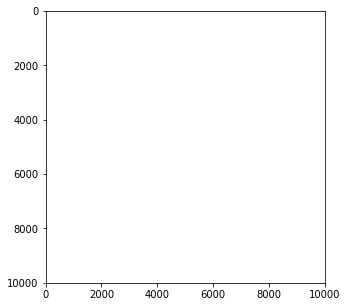

In [0]:
plt.rcParams["figure.figsize"] = (100, 100)
plt.pcolormesh(A_1, cmap=cm, norm=my_norm)
plt.gca().invert_yaxis()

In [0]:
b1 = 0
b2 = 0
b3 = 0
for i in range(A_1.shape[0]):
  for j in range(A_1.shape[1]):
    if A_1[i][j] < 1:
      b1 = b1 + 1
    elif A_1[i][j] < 3 and A_1[i][j] >= 1:
      b2 = b2 + 1
    else:
      b3 = b3 + 1
print(b1, "\t", b2, "\t", b3, end="\n")

99977327 	 22299 	 374


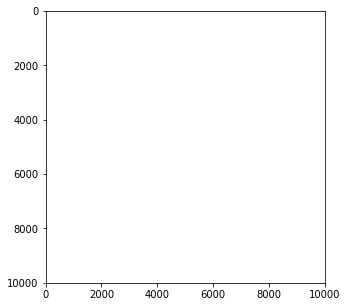

In [0]:
plt.rcParams["figure.figsize"] = (100, 100)
plt.pcolormesh(A_2, cmap=cm, norm=my_norm)
plt.gca().invert_yaxis()

In [0]:
b1 = 0
b2 = 0
b3 = 0
for i in range(A_2.shape[0]):
  for j in range(A_2.shape[1]):
    if A_2[i][j] < 1:
      b1 = b1 + 1
    elif A_2[i][j] < 3 and A_2[i][j] >= 1:
      b2 = b2 + 1
    else:
      b3 = b3 + 1
print(b1, "\t", b2, "\t", b3, end="\n")

99971724 	 27476 	 800


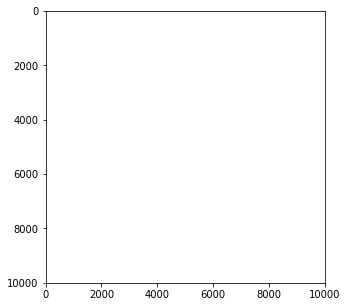

In [0]:
plt.rcParams["figure.figsize"] = (100, 100)
plt.pcolormesh(A_5, cmap=cm, norm=my_norm)
plt.gca().invert_yaxis()

In [0]:
b1 = 0
b2 = 0
b3 = 0
for i in range(A_5.shape[0]):
  for j in range(A_5.shape[1]):
    if A_5[i][j] < 1:
      b1 = b1 + 1
    elif A_5[i][j] < 3 and A_5[i][j] >= 1:
      b2 = b2 + 1
    else:
      b3 = b3 + 1
print(b1, "\t", b2, "\t", b3, end="\n")

99963214 	 34307 	 2479


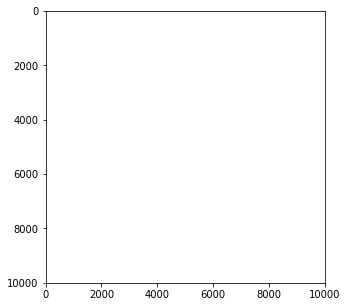

In [0]:
plt.rcParams["figure.figsize"] = (100, 100)
plt.pcolormesh(A_10, cmap=cm, norm=my_norm)
plt.gca().invert_yaxis()

In [0]:
b1 = 0
b2 = 0
b3 = 0
for i in range(A_10.shape[0]):
  for j in range(A_10.shape[1]):
    if A_10[i][j] < 1:
      b1 = b1 + 1
    elif A_10[i][j] < 3 and A_10[i][j] >= 1:
      b2 = b2 + 1
    else:
      b3 = b3 + 1
print(b1, "\t", b2, "\t", b3, end="\n")

99957052 	 38420 	 4528


In [0]:
S = s_gen_orig.sum()

In [0]:
m = A_orig.shape[0]
n = A_orig.shape[0]
k = np.arange(0, m, 500)
S_array = np.empty(int(m/500))
F_array = np.empty(int(m/500))
A_array = np.empty(int(m/500))
E_array = np.empty(int(m/500))

In [0]:
for i in range(int(m/500)):
  s_k = s_gen_orig[:k[i]]
  S_array[i] = s_k.sum()
  F_array[i] = S_array[i] / S
  U_temp, s_gen_temp, VT_temp = randomized_svd(A_orig_numpy, n_components=k[i], n_iter=5, random_state=None)
  Sigma_temp = zeros((k[i], k[i]))
  # populate Sigma with diagonal matrix
  Sigma_temp[:k[i], :k[i]] = diag(s_gen_temp)
  # reconstruct matrix
  A_temp = U_temp.dot(Sigma_temp.dot(VT_temp))
  E_temp = np.subtract(A_orig, A_temp)
  E_array[i] = LA.norm(E_temp, 'fro')

[0.         0.34238852 0.50226355 0.60938803 0.68762716 0.7482273
 0.79689436 0.83688053 0.87019595 0.89816845 0.92166042 0.94132174
 0.95748921 0.97056026 0.98082773 0.98858238 0.99411635 0.99766354
 0.99949755 1.        ]


Text(0, 0.5, 'F[k]')

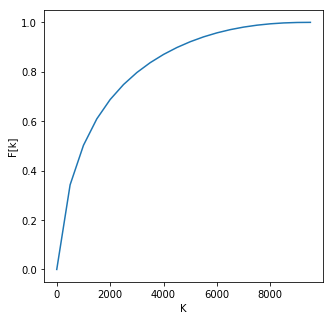

In [0]:
print(F_array)
plt.plot(k, F_array)
plt.xlabel("K")
plt.ylabel("F[k]")

[1.38642995e+03 7.12848534e+02 5.17507472e+02 4.00633830e+02
 3.21717313e+02 2.63333766e+02 2.17541376e+02 1.80133122e+02
 1.48694933e+02 1.21720264e+02 9.83143111e+01 7.77883302e+01
 6.00236642e+01 4.47438018e+01 3.18060939e+01 2.11248246e+01
 1.25197785e+01 6.04604523e+00 1.83266297e+00 1.01956334e-11]


Text(0, 0.5, 'E[k]')

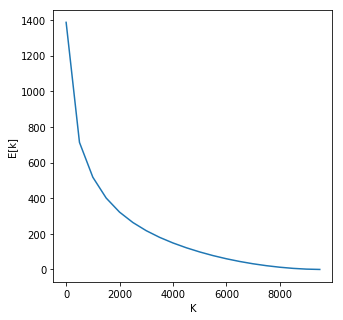

In [0]:
print(E_array)
plt.plot(k,E_array)
plt.xlabel("K")
plt.ylabel("E[k]")

Text(0, 0.5, 'E[k]')

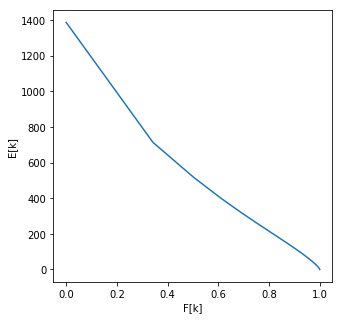

In [0]:
#print(F_array)
plt.plot(F_array, E_array)
plt.xlabel("F[k]")
plt.ylabel("E[k]")

In [0]:
1000, 3000, 6000

In [0]:
k=1000
U_1000, s_gen_1000, VT_1000 = randomized_svd(A_orig_numpy, n_components=k, n_iter=5, random_state=None)
Sigma_1000 = zeros((k, k))
# populate Sigma with diagonal matrix
Sigma_1000[:k, :k] = diag(s_gen_1000)
# reconstruct matrix
A_1000 = U_1000.dot(Sigma_1000.dot(VT_1000))
#print(A_1000)
print(U_1000.shape)
print(Sigma_1000.shape)
print(VT_1000.shape)
print(A_1000.shape)

(10000, 1000)
(1000, 1000)
(1000, 10000)
(10000, 10000)


In [0]:
k=3000
U_3000, s_gen_3000, VT_3000 = randomized_svd(A_orig_numpy, n_components=k, n_iter=5, random_state=None)
Sigma_3000 = zeros((k, k))
# populate Sigma with diagonal matrix
Sigma_3000[:k, :k] = diag(s_gen_3000)
# reconstruct matrix
A_3000 = U_3000.dot(Sigma_3000.dot(VT_3000))
#print(A_3000)
print(U_3000.shape)
print(Sigma_3000.shape)
print(VT_3000.shape)
print(A_3000.shape)

(10000, 3000)
(3000, 3000)
(3000, 10000)
(10000, 10000)


In [0]:
k=6000
U_6000, s_gen_6000, VT_6000 = randomized_svd(A_orig_numpy, n_components=k, n_iter=5, random_state=None)
Sigma_6000 = zeros((k, k))
# populate Sigma with diagonal matrix
Sigma_6000[:k, :k] = diag(s_gen_6000)
# reconstruct matrix
A_6000 = U_6000.dot(Sigma_6000.dot(VT_6000))
#print(A_6000)
print(U_6000.shape)
print(Sigma_6000.shape)
print(VT_6000.shape)
print(A_6000.shape)

(10000, 6000)
(6000, 6000)
(6000, 10000)
(10000, 10000)


In [0]:
cos_sim_matrix = cosine_similarity(A_orig)
cos_sim_matrix_1000 = cosine_similarity(A_1000)
cos_sim_matrix_3000 = cosine_similarity(A_3000)
cos_sim_matrix_6000 = cosine_similarity(A_6000)

In [0]:
threshold = 0.40
simi_818 = []
simi_1627 = []
simi_1659 = []
simi_2195 = []
simi_2916 = []
simi_5048 = []
simi_5606 = []
simi_6305 = []
simi_6803 = []
simi_7982 = []

In [0]:
for i in range(n):
  if cos_sim_matrix[818][i] >= threshold and i != 818:
    simi_818.append(i)
  if cos_sim_matrix[1627][i] >= threshold and i != 1627:
    simi_1627.append(i)
  if cos_sim_matrix[1659][i] >= threshold and i != 1659:
    simi_1659.append(i)
  if cos_sim_matrix[2195][i] >= threshold and i != 2195:
    simi_2195.append(i)
  if cos_sim_matrix[2916][i] >= threshold and i != 2916:
    simi_2916.append(i)
  if cos_sim_matrix[5048][i] >= threshold and i != 5048:
    simi_5048.append(i)
  if cos_sim_matrix[5606][i] >= threshold and i != 5606:
    simi_5606.append(i)
  if cos_sim_matrix[6305][i] >= threshold and i != 6305:
    simi_6305.append(i)
  if cos_sim_matrix[6803][i] >= threshold and i != 6803:
    simi_6803.append(i)
  if cos_sim_matrix[7982][i] >= threshold and i != 7982:
    simi_7982.append(i)

In [0]:
print(simi_818)
print(simi_1627)
print(simi_1659)
print(simi_2195)
print(simi_2916)
print(simi_5048)
print(simi_5606)
print(simi_6305)
print(simi_6803)
print(simi_7982)

[]
[281, 486, 2451, 3399, 4053, 5984, 6222, 6315, 7692, 8795]
[9062]
[961, 1699, 4181, 5259, 7038, 7091, 7161, 8226, 8708, 9691]
[72, 2341, 3545, 3592, 4236, 4452, 5324, 5665, 5688, 6188, 6361, 6473, 7302, 7411, 8113, 8854, 9660, 9985]
[]
[]
[2614]
[57, 141, 185, 8317, 9128, 9513, 9967]
[1076, 4928, 6498]


In [0]:
simi_1000_818 = []
simi_1000_1627 = []
simi_1000_1659 = []
simi_1000_2195 = []
simi_1000_2916 = []
simi_1000_5048 = []
simi_1000_5606 = []
simi_1000_6305 = []
simi_1000_6803 = []
simi_1000_7982 = []
simi_3000_818 = []
simi_3000_1627 = []
simi_3000_1659 = []
simi_3000_2195 = []
simi_3000_2916 = []
simi_3000_5048 = []
simi_3000_5606 = []
simi_3000_6305 = []
simi_3000_6803 = []
simi_3000_7982 = []
simi_6000_818 = []
simi_6000_1627 = []
simi_6000_1659 = []
simi_6000_2195 = []
simi_6000_2916 = []
simi_6000_5048 = []
simi_6000_5606 = []
simi_6000_6305 = []
simi_6000_6803 = []
simi_6000_7982 = []

In [0]:
for i in range(n):
  if cos_sim_matrix_1000[818][i] >= threshold and i != 818:
    simi_1000_818.append(i)
  if cos_sim_matrix_1000[1627][i] >= threshold and i != 1627:
    simi_1000_1627.append(i)
  if cos_sim_matrix_1000[1659][i] >= threshold and i != 1659:
	  simi_1000_1659.append(i)
  if cos_sim_matrix_1000[2195][i] >= threshold and i != 2195:
	  simi_1000_2195.append(i)
  if cos_sim_matrix_1000[2916][i] >= threshold and i != 2916:
	  simi_1000_2916.append(i)
  if cos_sim_matrix_1000[5048][i] >= threshold and i != 5048:
	  simi_1000_5048.append(i)
  if cos_sim_matrix_1000[5606][i] >= threshold and i != 5606:
	  simi_1000_5606.append(i)
  if cos_sim_matrix_1000[6305][i] >= threshold and i != 6305:
	  simi_1000_6305.append(i)
  if cos_sim_matrix_1000[6803][i] >= threshold and i != 6803:
	  simi_1000_6803.append(i)
  if cos_sim_matrix_1000[7982][i] >= threshold and i != 7982:
	  simi_1000_7982.append(i)
  if cos_sim_matrix_3000[818][i] >= threshold and i != 818:
	  simi_3000_818.append(i)
  if cos_sim_matrix_3000[1627][i] >= threshold and i != 1627:
	  simi_3000_1627.append(i)
  if cos_sim_matrix_3000[1659][i] >= threshold and i != 1659:
	  simi_3000_1659.append(i)
  if cos_sim_matrix_3000[2195][i] >= threshold and i != 2195:
	  simi_3000_2195.append(i)
  if cos_sim_matrix_3000[2916][i] >= threshold and i != 2916:
	  simi_3000_2916.append(i)
  if cos_sim_matrix_3000[5048][i] >= threshold and i != 5048:
	  simi_3000_5048.append(i)
  if cos_sim_matrix_3000[5606][i] >= threshold and i != 5606:
	  simi_3000_5606.append(i)
  if cos_sim_matrix_3000[6305][i] >= threshold and i != 6305:
	  simi_3000_6305.append(i)
  if cos_sim_matrix_3000[6803][i] >= threshold and i != 6803:
	  simi_3000_6803.append(i)
  if cos_sim_matrix_3000[7982][i] >= threshold and i != 7982:
	  simi_3000_7982.append(i)
  if cos_sim_matrix_6000[818][i] >= threshold and i != 818:
	  simi_6000_818.append(i)
  if cos_sim_matrix_6000[1627][i] >= threshold and i != 1627:
	  simi_6000_1627.append(i)
  if cos_sim_matrix_6000[1659][i] >= threshold and i != 1659:
	  simi_6000_1659.append(i)
  if cos_sim_matrix_6000[2195][i] >= threshold and i != 2195:
	  simi_6000_2195.append(i)
  if cos_sim_matrix_6000[2916][i] >= threshold and i != 2916:
    simi_6000_2916.append(i)
  if cos_sim_matrix_6000[5048][i] >= threshold and i != 5048:
	  simi_6000_5048.append(i)
  if cos_sim_matrix_6000[5606][i] >= threshold and i != 5606:
	  simi_6000_5606.append(i)
  if cos_sim_matrix_6000[6305][i] >= threshold and i != 6305:
	  simi_6000_6305.append(i)
  if cos_sim_matrix_6000[6803][i] >= threshold and i != 6803:
	  simi_6000_6803.append(i)
  if cos_sim_matrix_6000[7982][i] >= threshold and i != 7982:
	  simi_6000_7982.append(i)

In [0]:
print("In A_1000")
print(simi_1000_818)
print(simi_1000_1627)
print(simi_1000_1659)
print(simi_1000_2195)
print(simi_1000_2916)
print(simi_1000_5048)
print(simi_1000_5606)
print(simi_1000_6305)
print(simi_1000_6803)
print(simi_1000_7982)
print("In A_3000")
print(simi_3000_818)
print(simi_3000_1627)
print(simi_3000_1659)
print(simi_3000_2195)
print(simi_3000_2916)
print(simi_3000_5048)
print(simi_3000_5606)
print(simi_3000_6305)
print(simi_3000_6803)
print(simi_3000_7982)
print("In A_6000")
print(simi_6000_818)
print(simi_6000_1627)
print(simi_6000_1659)
print(simi_6000_2195)
print(simi_6000_2916)
print(simi_6000_5048)
print(simi_6000_5606)
print(simi_6000_6305)
print(simi_6000_6803)
print(simi_6000_7982)

In A_1000
[4290, 8017]
[281, 486, 685, 2451, 2667, 3124, 3132, 3144, 3399, 3750, 4053, 4412, 4564, 4940, 5215, 5523, 5693, 5984, 6222, 6315, 6563, 7376, 7692, 7751, 7965, 8257, 8795, 8988, 9351]
[9062]
[184, 511, 672, 804, 961, 1221, 1303, 1699, 2228, 2368, 2643, 3020, 3073, 3945, 4181, 4290, 4486, 4938, 5259, 6782, 7038, 7091, 7161, 8071, 8226, 8546, 8619, 8685, 8708, 8751, 8835, 9691, 9782]
[72, 242, 361, 558, 609, 668, 1026, 1797, 1986, 2341, 2419, 2566, 2574, 2620, 3022, 3107, 3374, 3545, 3592, 4236, 4268, 4302, 4321, 4448, 4452, 4539, 4601, 5040, 5324, 5410, 5499, 5568, 5665, 5688, 5824, 6188, 6361, 6396, 6404, 6473, 6553, 7141, 7302, 7411, 7839, 7877, 8013, 8080, 8096, 8113, 8267, 8854, 8878, 8974, 9172, 9606, 9660, 9727, 9833, 9854, 9985]
[37, 456, 482, 3992, 4049, 4297, 6055, 6083, 6839, 7111, 7196, 7234, 7315, 8527, 8831, 9052, 9891]
[4248, 6559]
[2453, 2614, 8214, 8925]
[57, 118, 139, 141, 185, 211, 573, 878, 1099, 1438, 2676, 3228, 3241, 3394, 4199, 4735, 4829, 5046, 5414, 5